In [1]:
import pandas  as pd
import seaborn as sns
from  xgboost import  XGBClassifier
import category_encoders as ce
from sklearn.model_selection import  GridSearchCV, train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes  import GaussianNB

In [2]:
train = pd.read_csv('C:\\Users\\Renz\\Desktop\\Data Science\\Python stuff\\Titanic Dataset\\train.csv', index_col = 'PassengerId')
test = pd.read_csv('C:\\Users\\Renz\\Desktop\\Data Science\\Python stuff\\Titanic Dataset\\test.csv',index_col = 'PassengerId')
df = pd.concat([train.drop('Survived', axis =1),  test])
df
y = train['Survived']

In [3]:
df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [4]:
#fill missing  values:
#age:
df['Age'].fillna(df['Age'].mean(), inplace = True)
#fare: (fill with average of class)
df['Fare'].fillna(13.302889,  inplace = True)
#cabin as is, assume  NaNs have no cabin LUL
#embarked with most frequent:
df['Embarked'].fillna(df['Embarked'].value_counts().index[0],  inplace = True)

# Feature  Engineering

In [5]:
#Getting prefix  from  names  to  increase  correlativity
df['Name'] = (df['Name'].str.split(',',  n =1, expand=True))[1]
df['Name'] = (df['Name'].str.split('.',  n =1, expand=True))[0]

In [6]:
#getting num cols  easily:
num_cols  = list(df.describe().columns)
obj_cols = [x  for  x in df.columns if df[x].dtype  == 'object']
obj_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [7]:
#drop  ticket column,  i feel its  irrelevant and whatever trend it shows is  coincidence.
df  = df.drop('Ticket',  axis =1)
df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,Mr,male,22.000000,1,0,7.2500,NaN,S
2,1,Mrs,female,38.000000,1,0,71.2833,C85,C
3,3,Miss,female,26.000000,0,0,7.9250,NaN,S
4,1,Mrs,female,35.000000,1,0,53.1000,C123,S
5,3,Mr,male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,29.881138,0,0,8.0500,NaN,S
1306,1,Dona,female,39.000000,0,0,108.9000,C105,C
1307,3,Mr,male,38.500000,0,0,7.2500,NaN,S


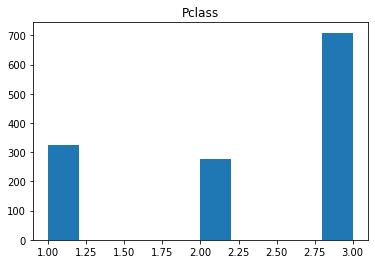

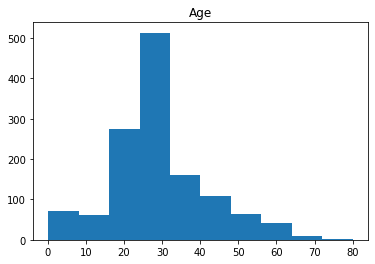

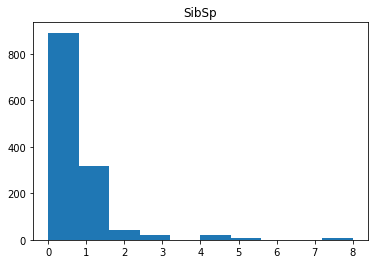

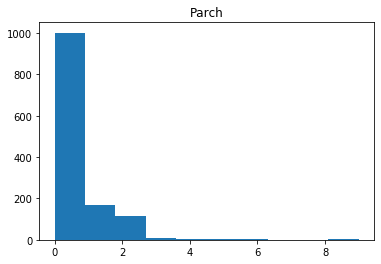

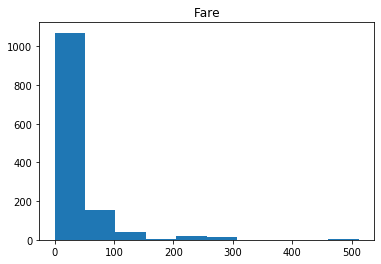

In [8]:
#histograms for numerical columns
for n  in  num_cols:
    try:
        plt.hist(df[n])
        plt.title(n)
        plt.show()
    except:
        pass
    

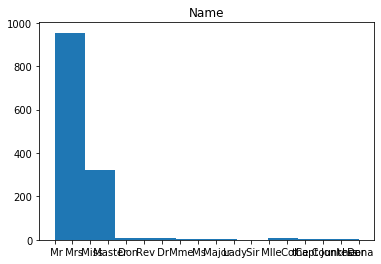

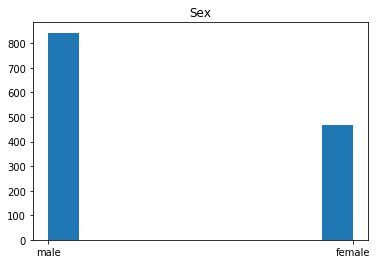

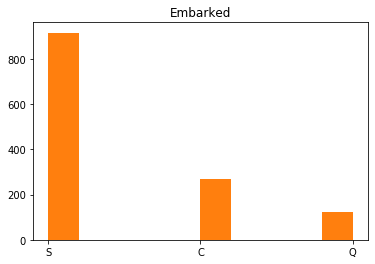

In [9]:
#cat columns histogram
for n  in obj_cols:
    try:
        plt.hist(df[n])
        plt.title(n)
        plt.show()
    except:
        pass

TO DO:

1. SibSp, Parch, Fare are  skewed. Log transform

2. Count encode prefixed

3. OHE  sex  and embarked

4. Cabin  Map

In [10]:
# number 1  todo: (fare lang pala.)
df['Fare'] = df['Fare'].map(lambda x: np.log(x) if x!= 0 else  0)
df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,Mr,male,22.000000,1,0,1.981001,NaN,S
2,1,Mrs,female,38.000000,1,0,4.266662,C85,C
3,3,Miss,female,26.000000,0,0,2.070022,NaN,S
4,1,Mrs,female,35.000000,1,0,3.972177,C123,S
5,3,Mr,male,35.000000,0,0,2.085672,NaN,S
...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,29.881138,0,0,2.085672,NaN,S
1306,1,Dona,female,39.000000,0,0,4.690430,C105,C
1307,3,Mr,male,38.500000,0,0,1.981001,NaN,S


In [11]:
# count encode names (worse scores)
#countenc =  ce.CountEncoder(cols=['Name'])
#df = countenc.fit_transform(df)
#df.head()

In [11]:
#getting  dummies of  sex and  embarked and name
df  = pd.get_dummies(df,  columns= ['Sex','Embarked','Name'])
df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,1.981001,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,38.000000,1,0,4.266662,C85,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,26.000000,0,0,2.070022,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,35.000000,1,0,3.972177,C123,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,35.000000,0,0,2.085672,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,29.881138,0,0,2.085672,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1306,1,39.000000,0,0,4.690430,C105,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1307,3,38.500000,0,0,1.981001,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
#get first letter of  existing  and check class levels:
df['Cabin'] = df['Cabin'].str[0:1]
df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,1.981001,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,38.000000,1,0,4.266662,C,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,26.000000,0,0,2.070022,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,35.000000,1,0,3.972177,C,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,35.000000,0,0,2.085672,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,29.881138,0,0,2.085672,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1306,1,39.000000,0,0,4.690430,C,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1307,3,38.500000,0,0,1.981001,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
df['Cabin'].fillna('U',  inplace = True)

In [15]:
classXcabin = df.groupby(['Pclass','Cabin']).Fare.count()
classXcabin

Pclass  Cabin
1       A         22
        B         65
        C         94
        D         40
        E         34
        T          1
        U         67
2       D          6
        E          4
        F         13
        U        254
3       E          3
        F          8
        G          5
        U        693
Name: Fare, dtype: int64

In [16]:
#map cabin values
cabinValues = {'U':0,'G':1,'F':2, 'E':3,'D':4,'T':5,'C':6,'B':7,'A':8}
df['Cabin'] = df['Cabin'].map(cabinValues)

In [18]:
#standard scale age (worse score)
#ct = ColumnTransformer([('age', StandardScaler(),['Age'])], remainder = 'passthrough')
#df['Age'] = ct.fit_transform(df)
#df.head()



# Model Selection


In [17]:
X= df.loc[train.index]

In [18]:
#split train data for xgb  fit validation
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X,y, random_state =  42,  train_size = 0.8)

In [25]:
xgb = XGBClassifier(seed =42,
                   colsample_bytree= 0.5,
                   subsample= 0.9,
                   n_estimators = 1000)
xgb.fit(Xtrain, ytrain,
       verbose = True,
       eval_metric = 'auc',
       early_stopping_rounds = 10,
       eval_set = [(Xvalid,yvalid)])

[0]	validation_0-auc:0.845817
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.877928
[2]	validation_0-auc:0.886422
[3]	validation_0-auc:0.879537
[4]	validation_0-auc:0.88166
[5]	validation_0-auc:0.877413
[6]	validation_0-auc:0.879215
[7]	validation_0-auc:0.878443
[8]	validation_0-auc:0.877027
[9]	validation_0-auc:0.878571
[10]	validation_0-auc:0.879344
[11]	validation_0-auc:0.880245
[12]	validation_0-auc:0.882304
Stopping. Best iteration:
[2]	validation_0-auc:0.886422



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.9, verbosity=1)

In [20]:
#params  testing rounds:
#best params for mean age (highest yet)
#params_grid = {'n_estimators': [80],
#               'gamma': [1],
#               'reg_lambda': [0.75],
#               'scale_pos_weight': [1],
#               'learning_rate': [0.06],
#               'max_depth' :[3]
#              }
params_grid = {'n_estimators': [80],
               'gamma': [1],
               'reg_lambda': [0.75],
               'scale_pos_weight': [1],
               'learning_rate': [0.06],
               'max_depth' :[3]
              }



In [21]:
gridsearch = GridSearchCV(estimator = xgb, param_grid = params_grid, verbose = 2, n_jobs =10,  cv = 3)
optimal_params =  gridsearch.fit(Xtrain,ytrain)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of   3 | elapsed:    2.0s finished


In [22]:
optimal_params.best_params_

{'gamma': 1,
 'learning_rate': 0.06,
 'max_depth': 3,
 'n_estimators': 80,
 'reg_lambda': 0.75,
 'scale_pos_weight': 1}

In [30]:
xgbBest = XGBClassifier(seed =42,
                   colsample_bytree= 0.5,
                   subsample= 0.9,
                   gamma= 1,
                   learning_rate= 0.06,
                   max_depth= 3,
                   n_estimators= 80,
                   reg_lambda= 0.75,
                   scale_pos_weight= 1
                       )
model = GaussianNB()


In [31]:
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
preds = model.predict(df.loc[test.index])

In [33]:
output = pd.DataFrame(data = {'PassengerId': test.index,
                       'Survived': preds})
output.to_csv('C:\\Users\\Renz\\Desktop\\Data Science\\Python stuff\\Titanic Dataset\\submission.csv', index=False)

In [29]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Including Surnames  gave us  worse predictions (75%)

Without surname: 77%

In [31]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,1.981001,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,38.0,1,0,4.266662,6,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,26.0,0,0,2.070022,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,35.0,1,0,3.972177,6,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,35.0,0,0,2.085672,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
